In [1]:
import os
from glob import glob
import json
from random import shuffle
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
from PIL import ImageFont
import random
import numpy as np
from tqdm.autonotebook import tqdm 
import random 
from utils_datasets import get_font, get_samples

fonts = glob("fonts/**.ttf")
font_names = open("fonts/font_names.txt", 'r').read().splitlines()
font_colors = ["black"]
font_colors_ar = ["اسود"]

font_names_en = ['diwani decorated', 'diwani diacritized', 'diwani long', 'diwani standard',
                'kufi standard', 'kufi curved suqare', 'farisi standard', 'morrocan andulus',
                'rukaa bold', 'rukaa standard', 'rukaa fast', 'thuluth diwani', 'thuluth standard'
                ,'square standard', 'free bold', 'free standard', 'free long', 'mobili', 'managa'
                , 'aljazeera']

/var/tmp/ipykernel_18421/4149188987.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
!rm -r data_10k_mulfont_128x128_en

In [9]:
max_words = 50
W, H = (64, 64)

train_samples, valid_samples, test_samples = get_samples(max_words = max_words)
dataset = {'train': train_samples, 'valid': valid_samples, 'test': test_samples}

features = []
i = 0
path_to_data = f"data_10k_mulfont_{W}x{H}_en"
os.mkdir(path_to_data)
os.mkdir(f"{path_to_data}/valid")
os.mkdir(f"{path_to_data}/train")
os.mkdir(f"{path_to_data}/test")

In [10]:
capts = {}
pbar = tqdm(total=max_words*20)
for split in dataset:
    for _, word in enumerate(dataset[split]):
        for _, font_type in enumerate(fonts):
            w, h = (W, H)
            #choose background and resize
            bg = np.random.choice(glob('fonts-bgs/**.jpg'))
            img = Image.open(bg)
            img = img.resize((W, H))
            #choose a font color
            font_color = np.random.choice(font_colors)
            font_color_ar = font_colors_ar[font_colors.index(font_color)]
            #get font description
            ft_idx = int(font_type[6:-4]) - 1
            font_name = font_names[ft_idx]
            #draw the font on the canvas given a premissable font size
            n_attempts = 1
            #insert space
            if random.random() < 0.01 and len(word) > 2:
                rnd_idx = random.randint(1, len(word) - 1)
                word = word[:rnd_idx] + ' ' + word[rnd_idx:]

            draw = ImageDraw.Draw(img)
            font, w, h, x, y = get_font(draw, word, font_type, width = W, height = H)
            draw.text((x, y), word, (0, 0, 0), font)
            file_name = f"{word}_{i:05d}"
            img.save(f"{path_to_data}/{split}/{file_name}.png")
            capts[file_name] = font_names_en[ft_idx]
            open(f"{path_to_data}/{split}/{file_name}.txt", 'w').write(word)
            i += 1
            pbar.update(1) 

  0%|          | 0/1000 [00:00<?, ?it/s]

In [11]:
capts[list(capts.keys())[0]]
with open(f"{path_to_data}/capts.json", "w") as fp:
    json.dump(capts,fp) 

وجود
diwani diacritized


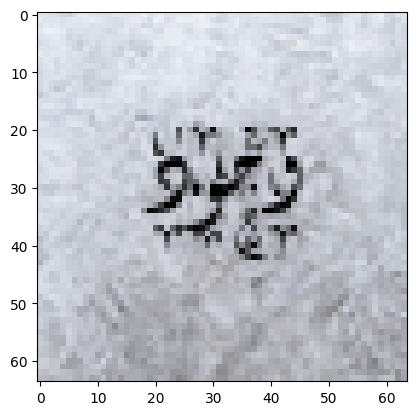

على
morrocan andulus


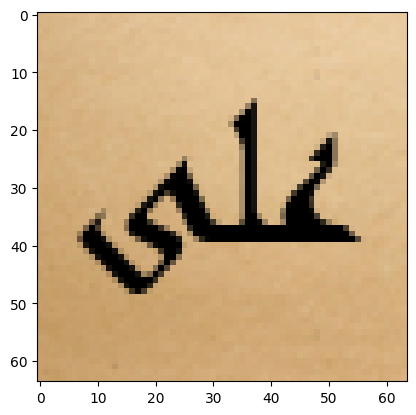

عدة
thuluth diwani


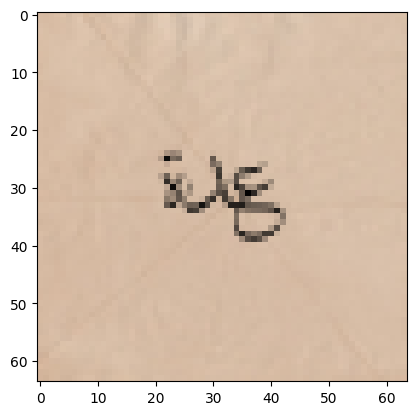

الثاني
managa


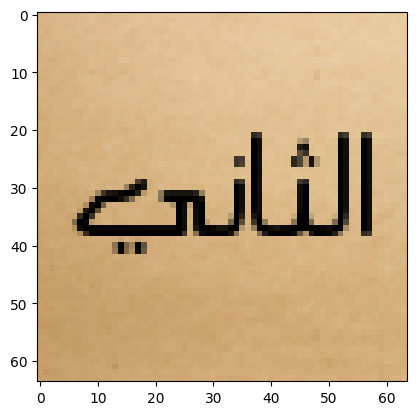

ومبيعاتهم
diwani standard


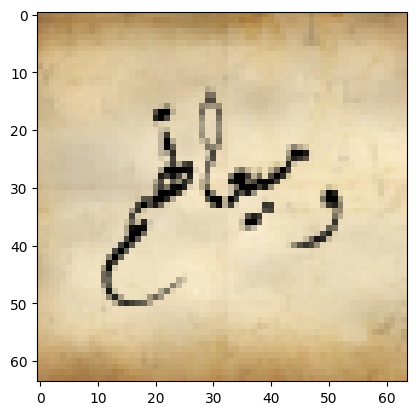

تمكنا
rukaa standard


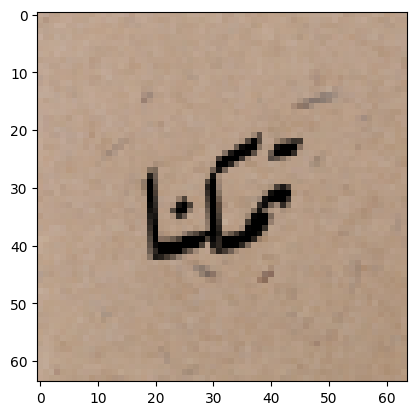

للضحك
managa


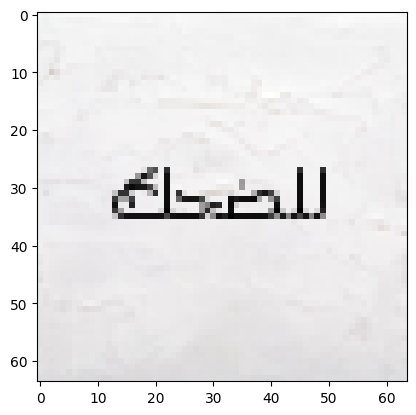

غوارديولا
thuluth standard


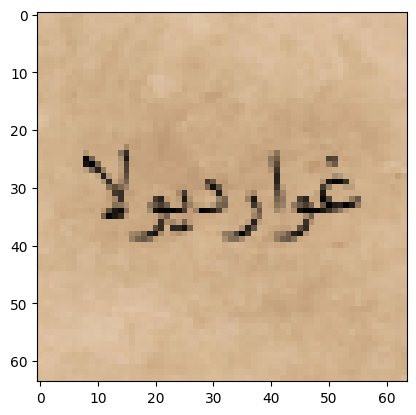

يبدو
managa


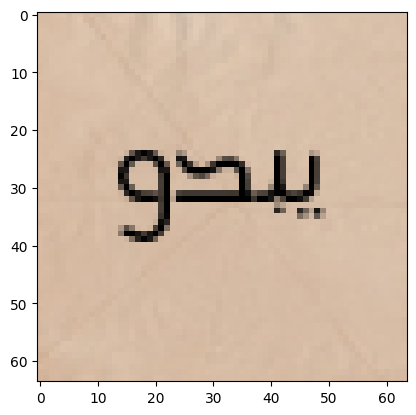

تقبل
diwani diacritized


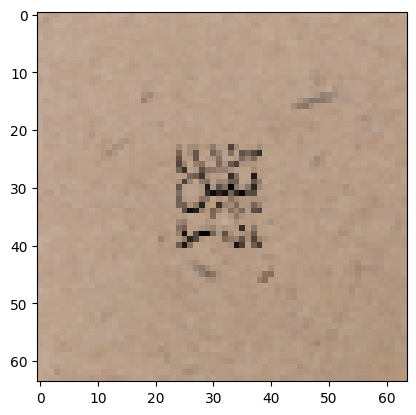

كل تا
diwani long


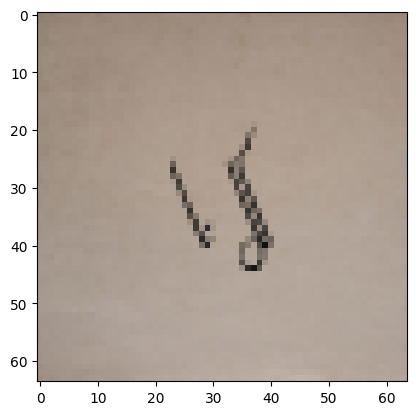

الإمكا نات
diwani standard


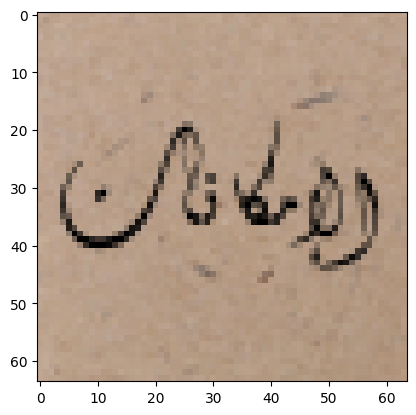

عنصر
thuluth standard


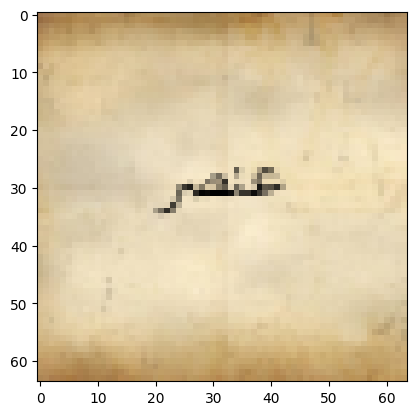

على
farisi standard


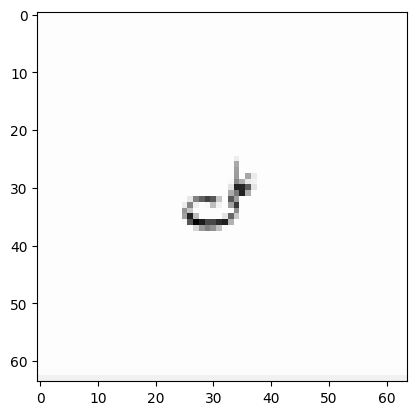

عدة
rukaa bold


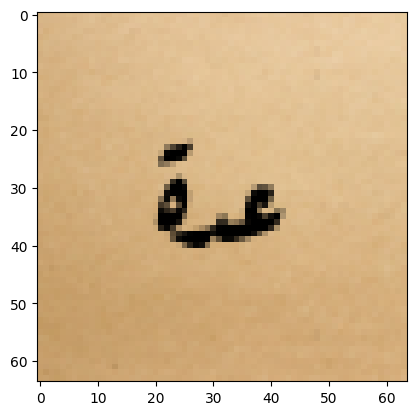

المتبادل
thuluth standard


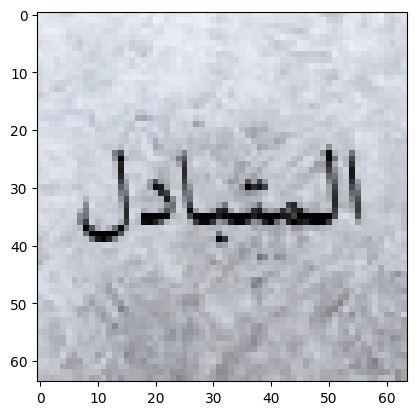

لل مشاركة
kufi standard


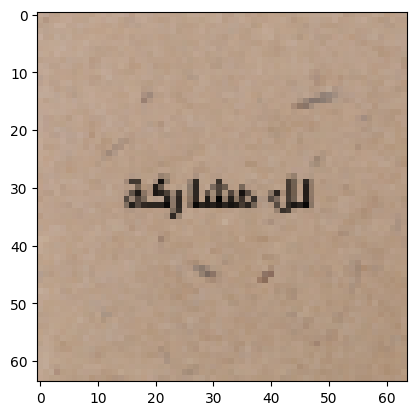

للميليشيات
diwani decorated


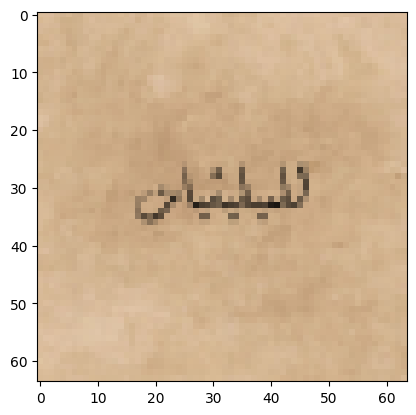

القاسية
rukaa bold


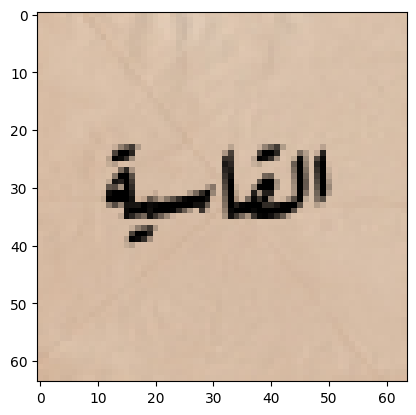

تزايد
aljazeera


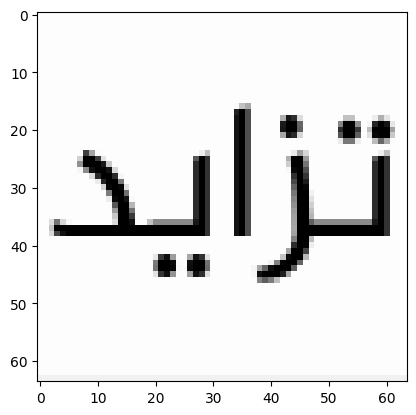

اصطفت
morrocan andulus


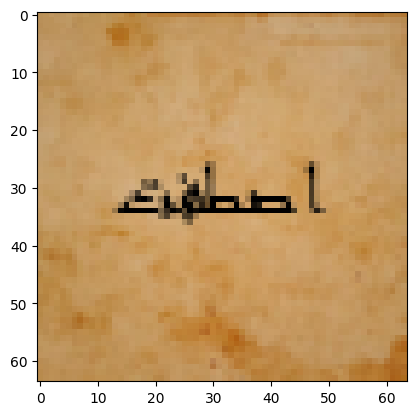

قطاع
mobili


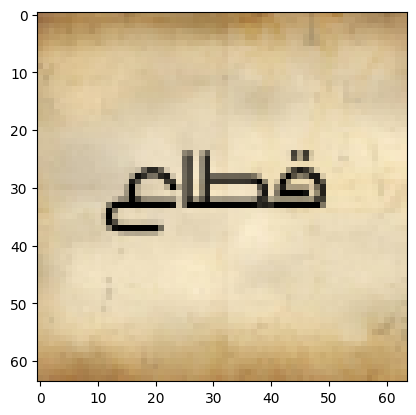

باسم
thuluth diwani


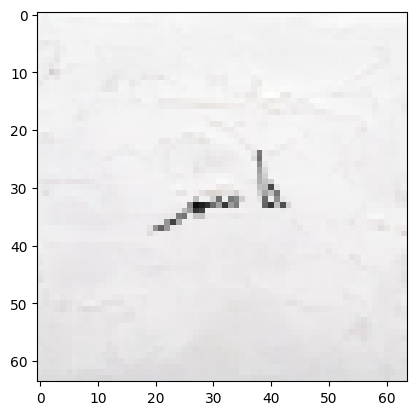

قطاع
diwani long


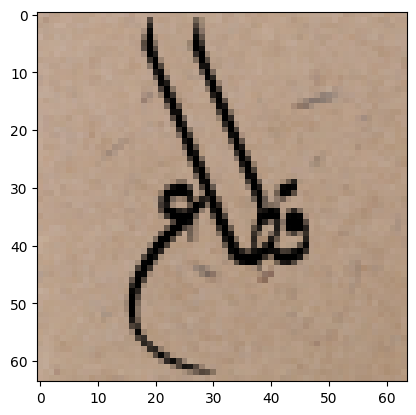

بالمدينة
rukaa standard


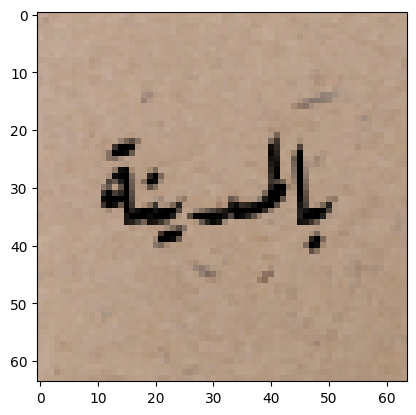

مساحة
mobili


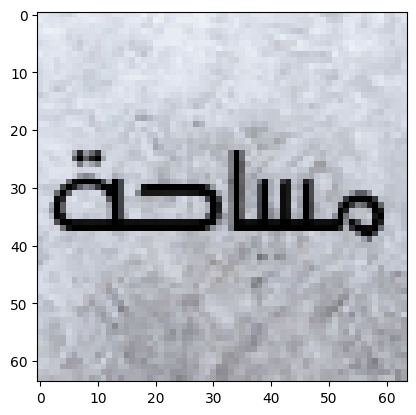

لا
managa


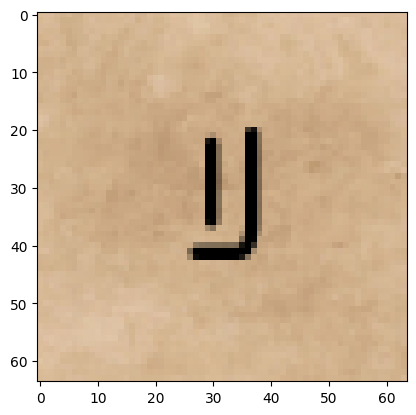

الثاني
farisi standard


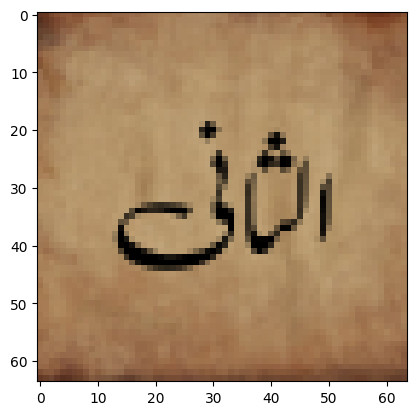

بعدئذ
thuluth diwani


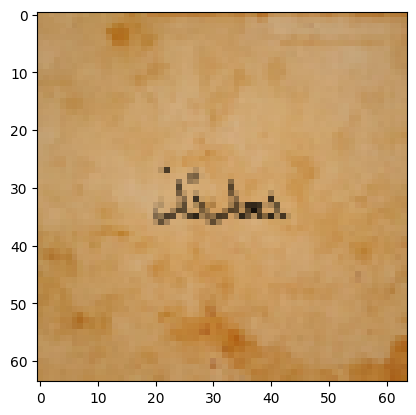

يبدو
diwani decorated


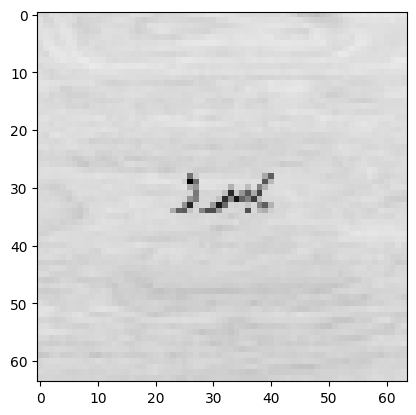

وجود
free standard


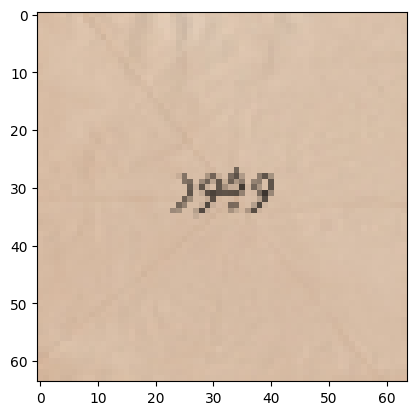

للميليشيات
kufi standard


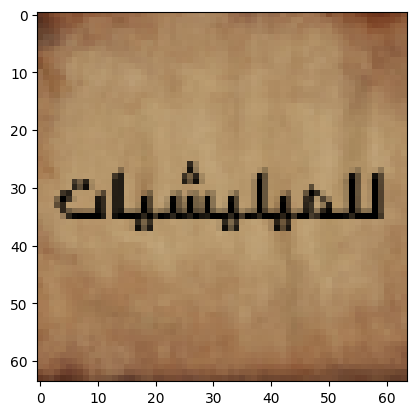

اصطفت
diwani standard


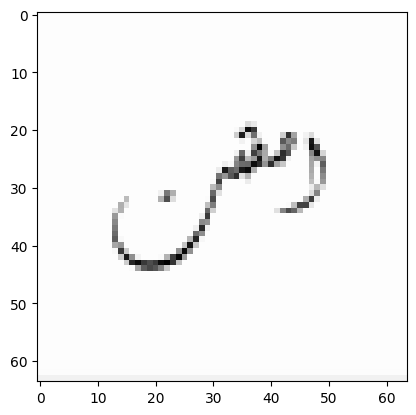

التطبيقات
diwani standard


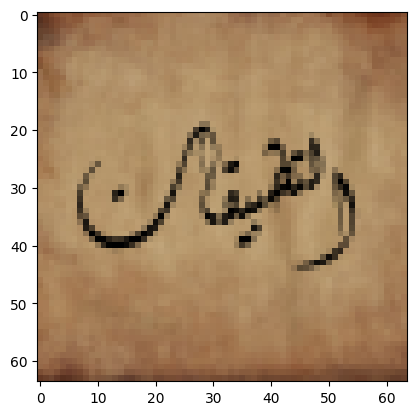

يبدو
thuluth diwani


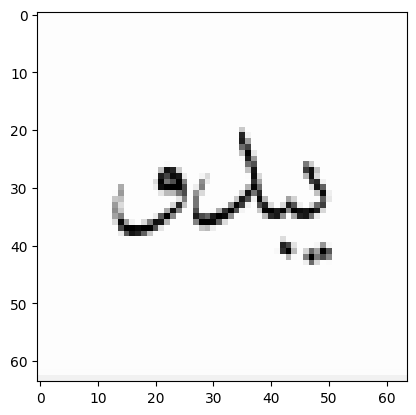

الفئة
kufi curved suqare


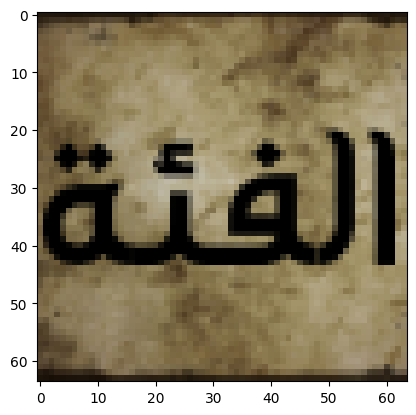

منخفضة
aljazeera


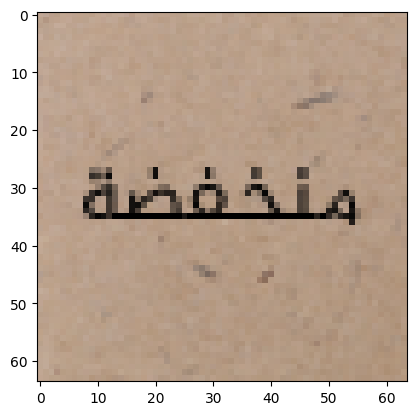

بعدئذ
rukaa bold


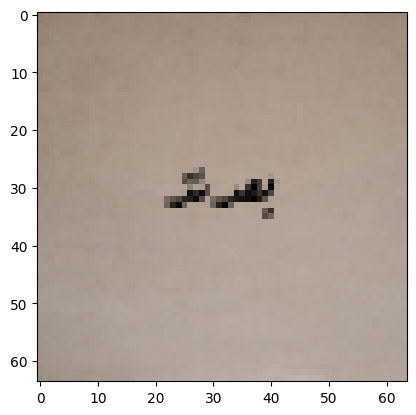

مساحة
diwani long


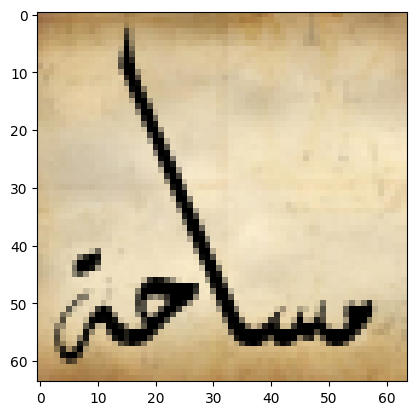

لتذ كيرهم
kufi standard


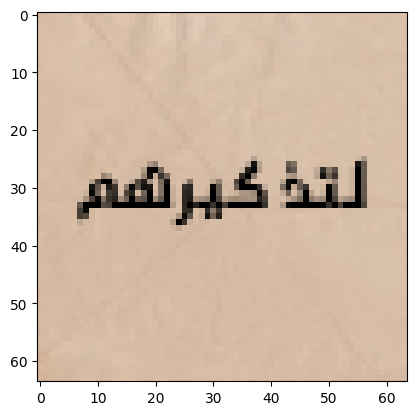

كل تا
kufi standard


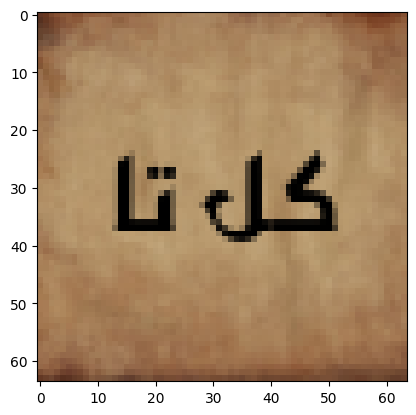

صالات
diwani diacritized


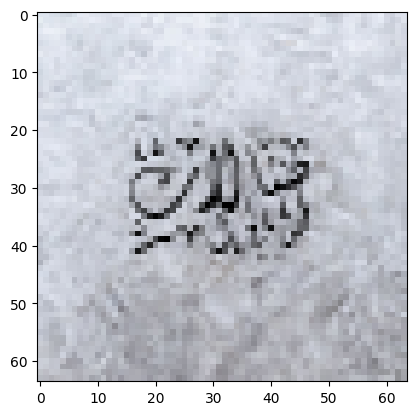

قطاع
diwani standard


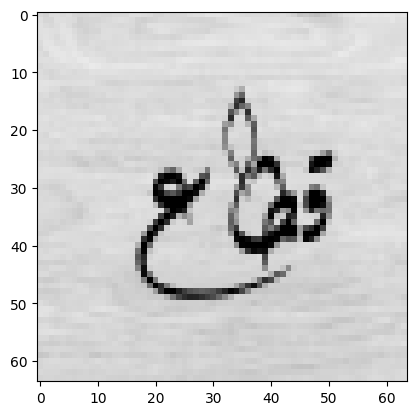

In [12]:
base_path = f"{path_to_data}/train"
for i, img_name in enumerate(os.listdir(base_path)):
    key, _ = img_name.split('.')    
    if img_name.endswith(".png"):
        txt = open(f"{base_path}/{img_name[:-4]}.txt", "r").read()
        capt = capts.get(key)
        print(txt)
        print(capt)
        im = Image.open(f"{base_path}/{img_name}")
        plt.imshow(im)
        plt.show()
        if i > 100:
            break